<a href="https://colab.research.google.com/github/moinul7002/Data-Driven-Diagnosis-of-Heart-Disease-using-Machine-Learning-Approaches-with-RFE/blob/main/Heart_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [131]:
from google.colab import files 
uploaded = files.upload()

Saving heart_cleveland.csv to heart_cleveland (3).csv


In [132]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['heart_cleveland.csv']))

print(df)

     age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  condition
0     69    1   0       160   234  ...      0.1      1   1     0          0
1     69    0   0       140   239  ...      1.8      0   2     0          0
2     66    0   0       150   226  ...      2.6      2   0     0          0
3     65    1   0       138   282  ...      1.4      1   1     0          1
4     64    1   0       110   211  ...      1.8      1   0     0          0
..   ...  ...  ..       ...   ...  ...      ...    ...  ..   ...        ...
292   40    1   3       152   223  ...      0.0      0   0     2          1
293   39    1   3       118   219  ...      1.2      1   0     2          1
294   35    1   3       120   198  ...      1.6      1   0     2          1
295   35    0   3       138   183  ...      1.4      0   0     0          0
296   35    1   3       126   282  ...      0.0      0   0     2          1

[297 rows x 14 columns]


In [133]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [8]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  condition
0     69    1   0       160   234  ...      0.1      1   1     0          0
1     69    0   0       140   239  ...      1.8      0   2     0          0
2     66    0   0       150   226  ...      2.6      2   0     0          0
3     65    1   0       138   282  ...      1.4      1   1     0          1
4     64    1   0       110   211  ...      1.8      1   0     0          0
..   ...  ...  ..       ...   ...  ...      ...    ...  ..   ...        ...
292   40    1   3       152   223  ...      0.0      0   0     2          1
293   39    1   3       118   219  ...      1.2      1   0     2          1
294   35    1   3       120   198  ...      1.6      1   0     2          1
295   35    0   3       138   183  ...      1.4      0   0     0          0
296   35    1   3       126   282  ...      0.0      0   0     2          1

[297 rows x 14 columns]>

In [9]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [97]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


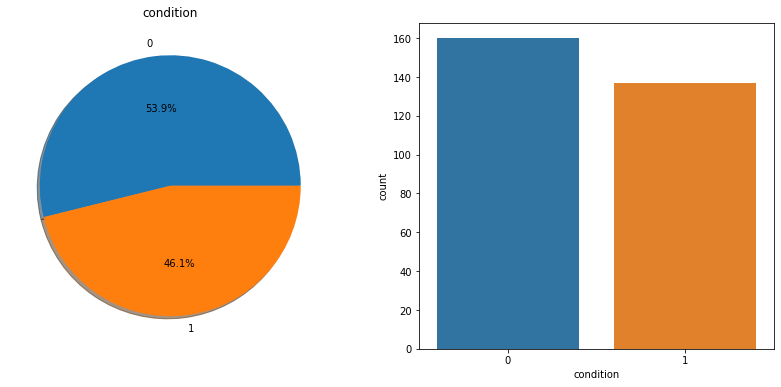

In [135]:
# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['condition'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('condition')
ax[0].set_ylabel('')
sns.countplot('condition', data=df, ax=ax[1])
plt.show()

In [136]:
df.isnull().sum().sum()

0

In [137]:
# Renaming columns.
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [138]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

In [139]:
# Renaming cateorical data for easier understanding:

df['sex'] = df['sex'].map({0:'female',1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
df['rest_ecg'] = df['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0:'no',1:'yes'})
df['st_slope'] = df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
df['thalassemia'] = df['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})
# df['condition'] = df['condition'].map({0:'no_disease', 1:'has_disease'})

In [140]:
# Masks for easier selection in future:

categorical = [i for i in df.loc[:,df.nunique()<=10]]
numerical = [i for i in df.loc[:,df.nunique()>=10]]

## Univariate Analysis

Count Plots of Categorical Columns

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


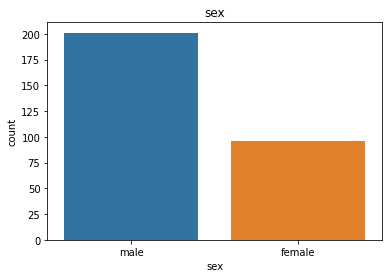

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


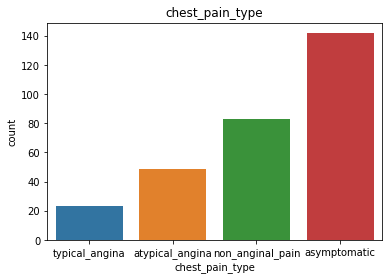

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


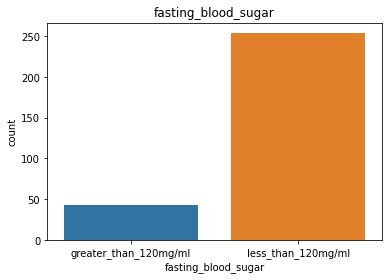

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


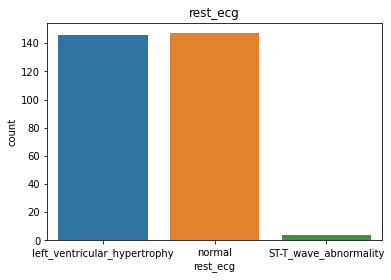

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


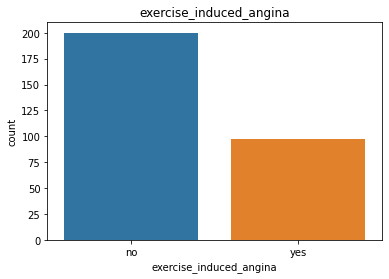

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


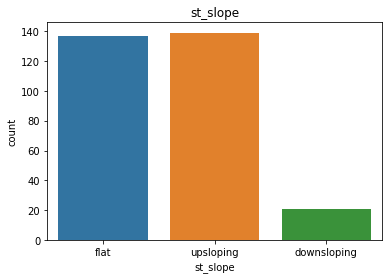

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


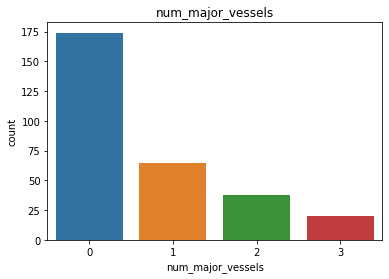

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


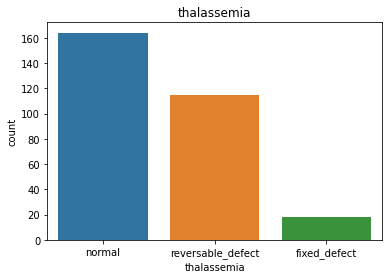

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


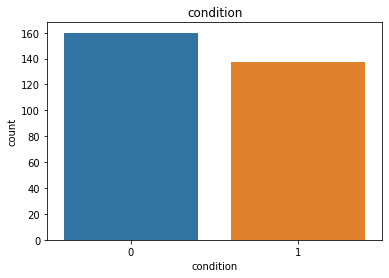

In [130]:
print("Count Plots of Categorical Columns");print()
for i in df[categorical]:
        print('*'*100)
        sns.countplot(df[i])
        plt.title(i)
        plt.show()

Density Plots

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


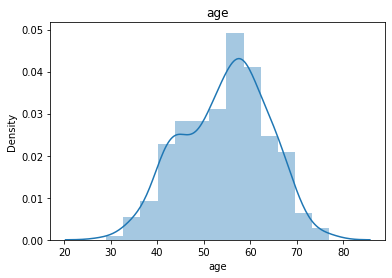

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


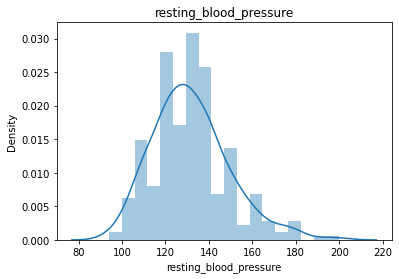

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


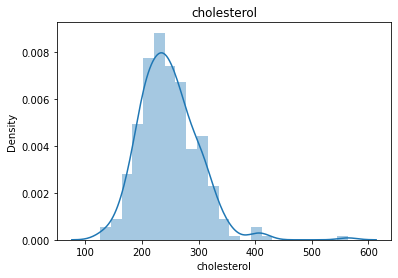

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


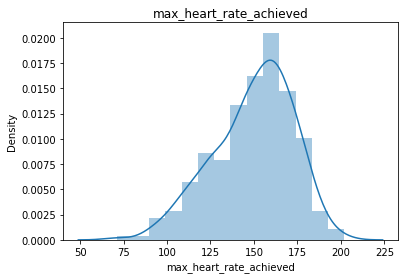

****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


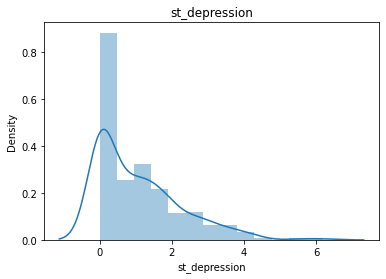

In [131]:
print("Density Plots");print()
for i in df[numerical]:
        print('*'*100)
        sns.distplot(df[i])
        plt.title(i)
        plt.show()

## Multivariate Analysis

<Figure size 1152x720 with 0 Axes>

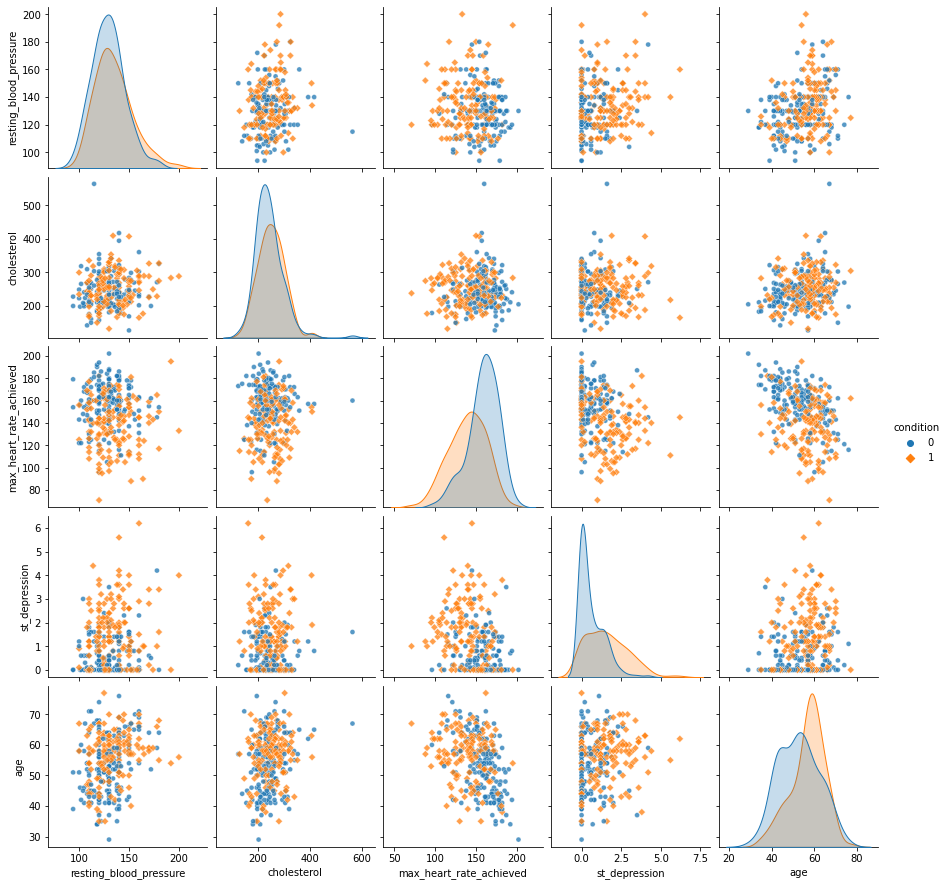

In [132]:
# Numeric data vs each other and condition:

plt.figure(figsize=(16, 10))
sns.pairplot(df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], hue='condition',
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()


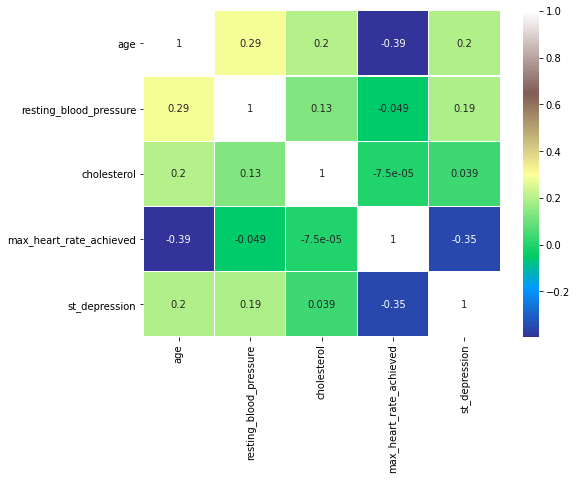

In [133]:
# create a correlation heatmap
sns.heatmap(df[numerical].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [ ]:
# df[categorical]=df[categorical].replace(0,'no')
# df[categorical]=df[categorical].replace(1,'yes')

# df.Smokes_yrs=df.Smokes_yrs.astype('float64')
# df.IUD_years=df.IUD_years.astype('float64')
# df.Smokes_packs_yr=df.Smokes_packs_yr.astype('float64')
# df['smokes_yr_cat']=pd.cut(df.Smokes_yrs,[-1,2,5,10,15,20,25,50],labels=['<2','2-5','5-10','10-15','15-20','20-25','>25'])
# df=df.drop(['Smokes_yrs'],axis=1)
# df['smokepack_yr_cat']=pd.cut(df.Smokes_packs_yr,[-1,2,5,10,20,50],labels=['<2','2-5','5-10','10-20','>20'])
# df=df.drop(['Smokes_packs_yr'],axis=1)
# df['IUD_years_bin']=pd.cut(df.IUD_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])
# df=df.drop(['IUD_years'],axis=1)
# df['Hormonal_years_bin']=pd.cut(df.Hormonal_Contraceptives_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])

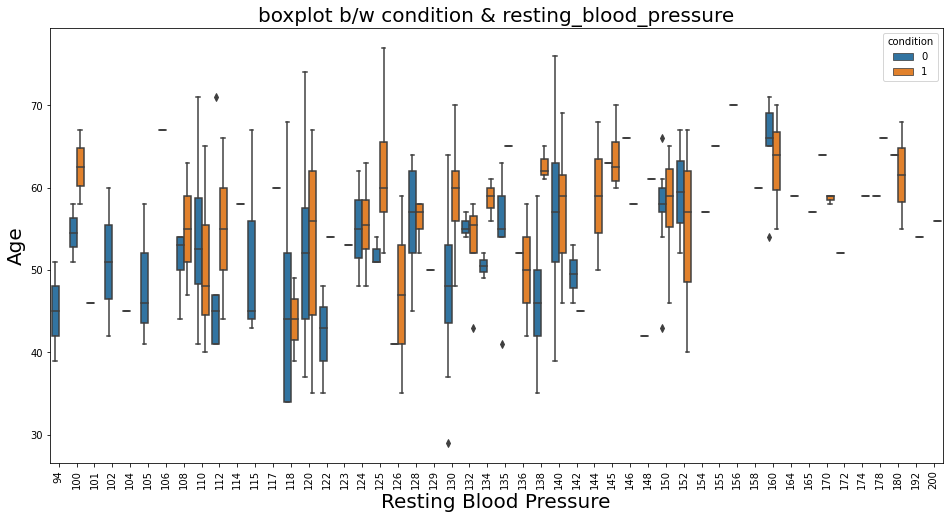

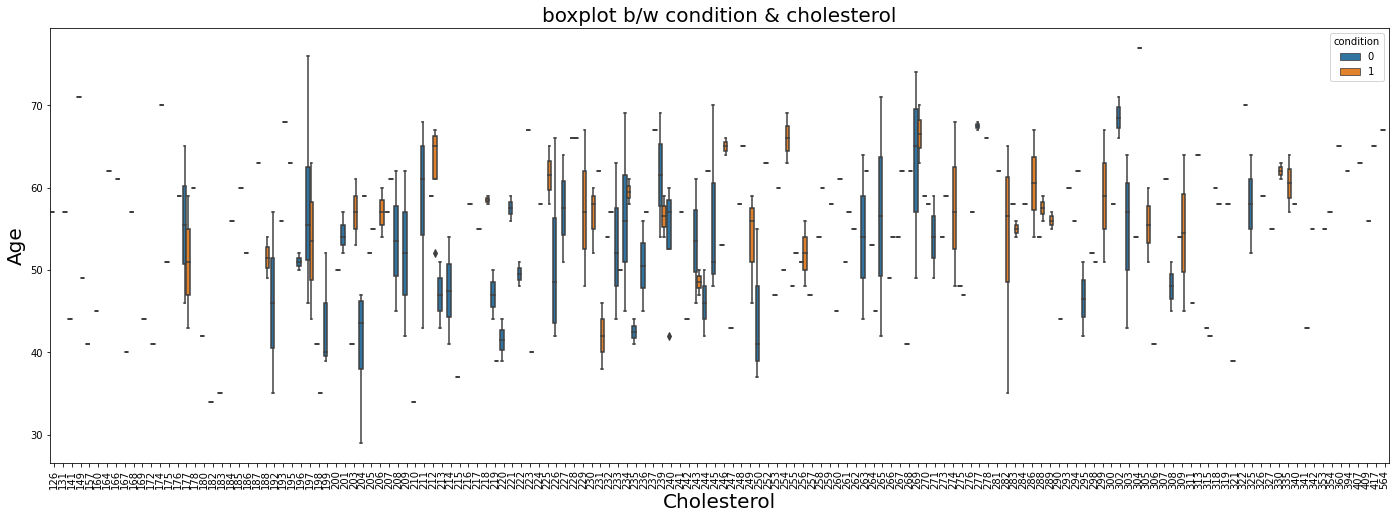

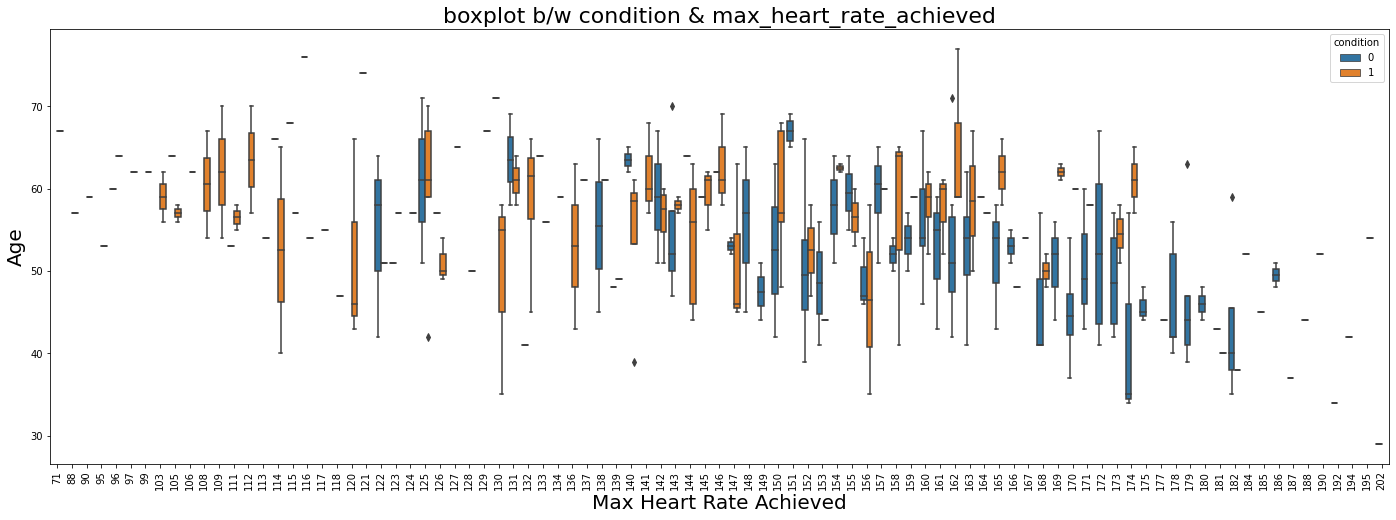

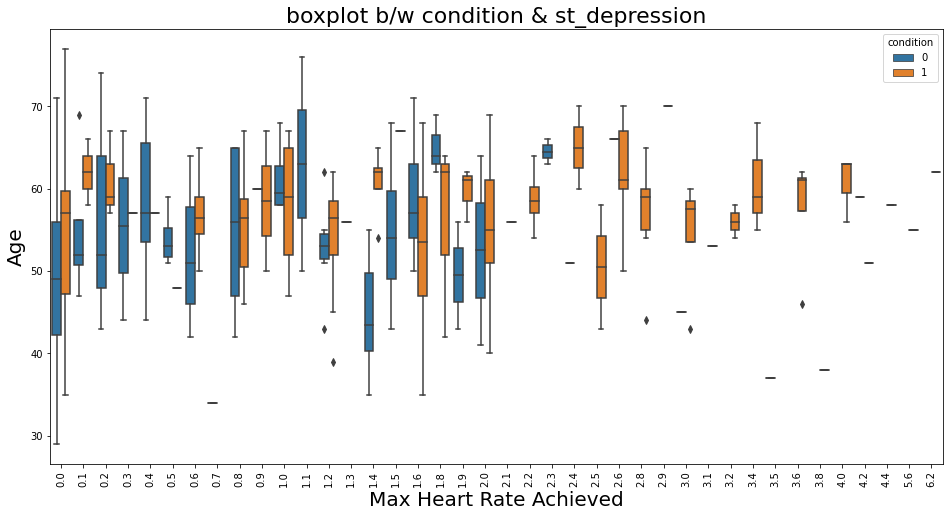

In [134]:
plt.figure(figsize=(16,8))
a=sns.boxplot(x=df['resting_blood_pressure'],y=df['age'], hue=df['condition'])
a.axes.set_title("boxplot b/w condition & resting_blood_pressure",fontsize=20)
a.set_xlabel("Resting Blood Pressure",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(24,8))
a=sns.boxplot(x=df['cholesterol'],y=df['age'], hue=df['condition'])
a.axes.set_title("boxplot b/w condition & cholesterol",fontsize=20)
a.set_xlabel("Cholesterol",fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

plt.figure(figsize=(24,8))
a=sns.boxplot(x=df['max_heart_rate_achieved'],y=df['age'], hue=df['condition'])
a.axes.set_title("boxplot b/w condition & max_heart_rate_achieved",fontsize=22)
a.set_xlabel('Max Heart Rate Achieved',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

plt.figure(figsize=(16,8))
a=sns.boxplot(x=df['st_depression'],y=df['age'], hue=df['condition'])
a.axes.set_title("boxplot b/w condition & st_depression",fontsize=22)
a.set_xlabel('Max Heart Rate Achieved',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()


## Train-Test_Split

In [141]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [142]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,x_train,y_train,x_test,y_test, atype='',verbose=0):
    algo_name.fit(x_train, y_train)
    Y_pred = algo_name.predict(x_test)
    acc_train = round(algo_name.score(x_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(x_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred


In [143]:
x = df.drop('condition', axis=1)
y = df['condition']

cat_df = pd.get_dummies(data=df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']])
x.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
x = pd.concat([x, cat_df], axis=1)



SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1) # for KNN

## ML Apply for Original Dataset

In [144]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=10)
knneig.fit(x_train1, y_train)
# pred_knneigh = knneig.predict(x_test1)
# score_knneigh_before = accuracy_score(y_test, pred_knneigh)
# print(score_knneigh_before)
predict(knneig,x_train1,y_train,x_test1,y_test)
print(classification_report(y_test, knneig.predict(x_test1)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(knneig, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))


Training Accuracy: 85.02
Testing  Accuracy: 81.11
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        51
           1       0.74      0.87      0.80        39

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90

Cross Validation Score: 0.673 (0.081)


In [145]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 0)
predict(rf,x_train,y_train,x_test,y_test)
print(classification_report(y_test, rf.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))


Training Accuracy: 100.0
Testing  Accuracy: 82.22
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        51
           1       0.74      0.90      0.81        39

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90

Cross Validation Score: 0.811 (0.063)


In [108]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,x_train,y_train,x_test,y_test)
print(classification_report(y_test, lr.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 86.47
Testing  Accuracy: 85.56
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.78      0.92      0.85        39

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.86      0.86        90

Cross Validation Score: 0.844 (0.055)


In [109]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,x_train,y_train,x_test,y_test)
print(classification_report(y_test, gbc.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(gbc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 99.52
Testing  Accuracy: 80.0
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        51
           1       0.71      0.90      0.80        39

    accuracy                           0.80        90
   macro avg       0.81      0.81      0.80        90
weighted avg       0.82      0.80      0.80        90

Cross Validation Score: 0.804 (0.048)


In [24]:
# ADA

ada = AdaBoostClassifier()
predict(ada,x_train,y_train,x_test,y_test)
print(classification_report(y_test, ada.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ada, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 94.69
Testing  Accuracy: 78.89
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        51
           1       0.72      0.85      0.78        39

    accuracy                           0.79        90
   macro avg       0.79      0.80      0.79        90
weighted avg       0.80      0.79      0.79        90

Cross Validation Score: 0.804 (0.067)


In [110]:
# DT

dt = DecisionTreeClassifier()
predict(dt,x_train,y_train,x_test,y_test)
print(classification_report(y_test, dt.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 100.0
Testing  Accuracy: 74.44
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.68      0.77      0.72        39

    accuracy                           0.74        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.75      0.74      0.75        90

Cross Validation Score: 0.717 (0.075)


In [111]:
#GaussianNB

nb = GaussianNB()
predict(nb,x_train,y_train,x_test,y_test)
print(classification_report(y_test, nb.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(nb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 83.57
Testing  Accuracy: 84.44
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        51
           1       0.79      0.87      0.83        39

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.85        90

Cross Validation Score: 0.815 (0.064)


In [27]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,x_train,y_train,x_test,y_test)
print(classification_report(y_test, xg.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xg, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 99.52
Testing  Accuracy: 85.56
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.81      0.87      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

Cross Validation Score: 0.809 (0.059)


In [28]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,x_train,y_train,x_test,y_test)
print(classification_report(y_test, svc.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 86.96
Testing  Accuracy: 85.56
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.82      0.85      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Cross Validation Score: 0.827 (0.057)


In [29]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
predict(mlp,x_train,y_train,x_test,y_test)
print(classification_report(y_test, mlp.predict(x_test)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(mlp, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 77.29
Testing  Accuracy: 77.78
              precision    recall  f1-score   support

           0       0.88      0.71      0.78        51
           1       0.69      0.87      0.77        39

    accuracy                           0.78        90
   macro avg       0.79      0.79      0.78        90
weighted avg       0.80      0.78      0.78        90

Cross Validation Score: 0.822 (0.067)


In [30]:
# ROC Curve

r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(x_test1)
RF_probs = rf.predict_proba(x_test)
GBC_probs = gbc.predict_proba(x_test)
NB_probs = nb.predict_proba(x_test)
LR_probs = lr.predict_proba(x_test)
svc_probs = svc.predict_proba(x_test)
mlp_probs = mlp.predict_proba(x_test)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
NB_probs = NB_probs[:, 1]
svc_probs = svc_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

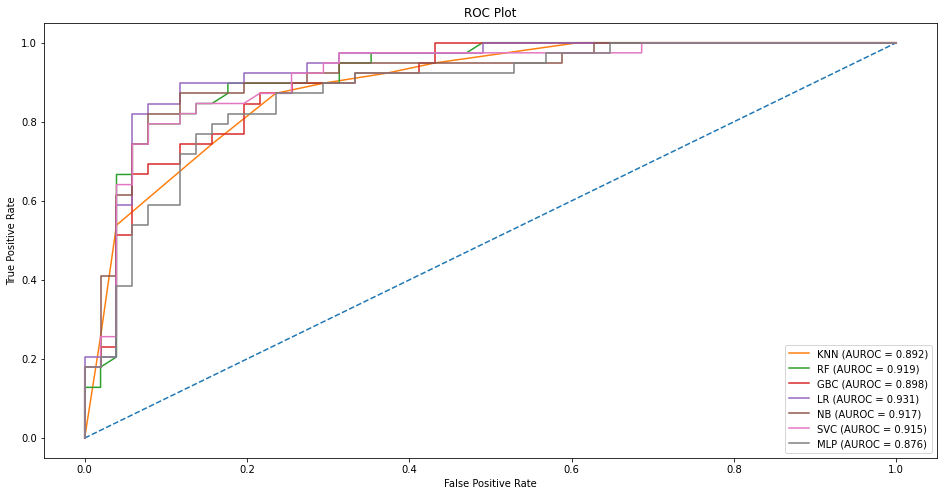

In [112]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(NB_fpr, NB_tpr, label='NB (AUROC = %0.3f)' % NB_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(mlp_fpr, mlp_tpr, label='MLP (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Feature Extraction

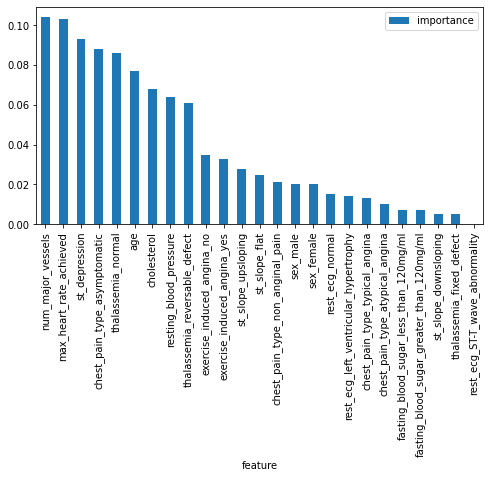

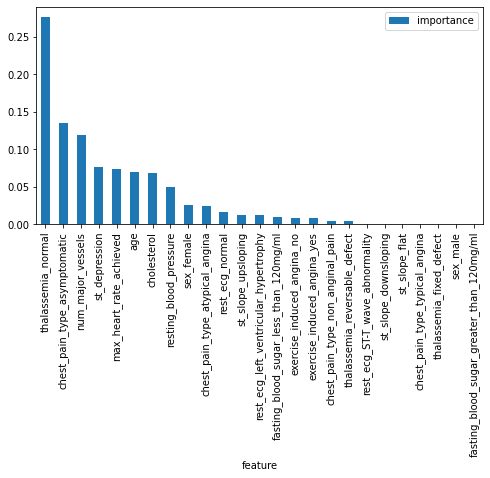

In [113]:

# extract important features
rf.fit(x,y);
score = np.round(rf.feature_importances_,3)
importances = pd.DataFrame({'feature':x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (8, 4)
importances.plot.bar();

# extract important features
dt.fit(x,y);
score = np.round(dt.feature_importances_,3)
importances = pd.DataFrame({'feature':x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (8, 4)
importances.plot.bar();

In [114]:
classifiers = [knneig, rf, dt, svc, ada, gbc, mlp, xg, nb, lr]

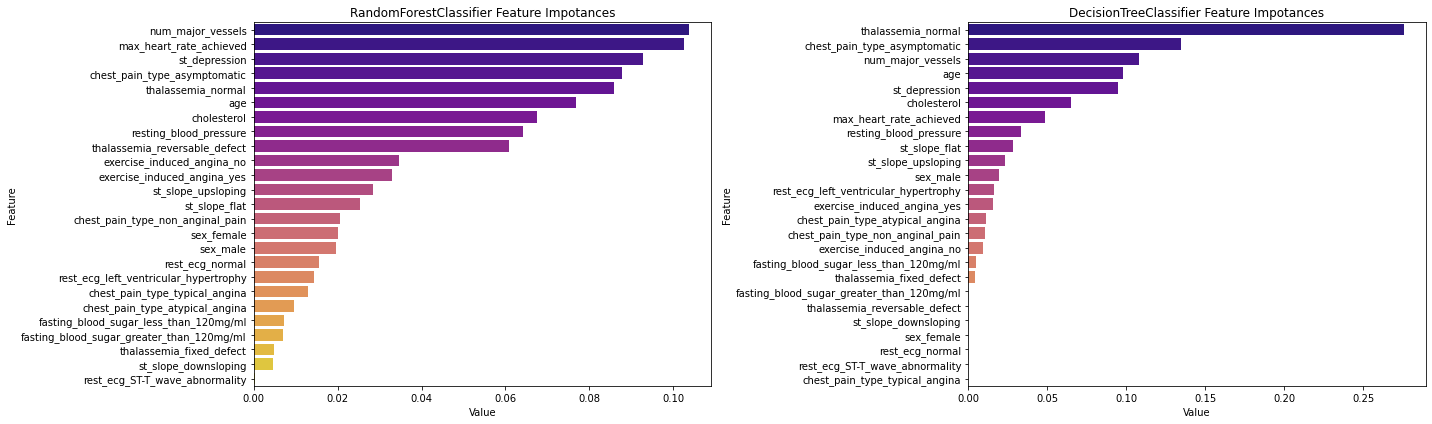

In [115]:
def f_imp(classifiers, X, y, bins):
    
    ''' A function for displaying feature importances'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

# Feature importances:

f_imp([rf,dt], x, y, 6)


## Recursive Feature Elimination (RFE)

In [154]:
from sklearn.feature_selection import RFECV
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFECV(estimator=rfc, step=15, cv=RepeatedKFold(n_splits=5, random_state=42), scoring='roc_auc', verbose=2)
rfe = rfe.fit(x, y)

Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 features.
Fitting estimator with 25 features.
Fitting estimator with 10 fe

In [155]:
print('Optimal number of features:', rfe.n_features_)
rfe.ranking_

Optimal number of features: 25


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

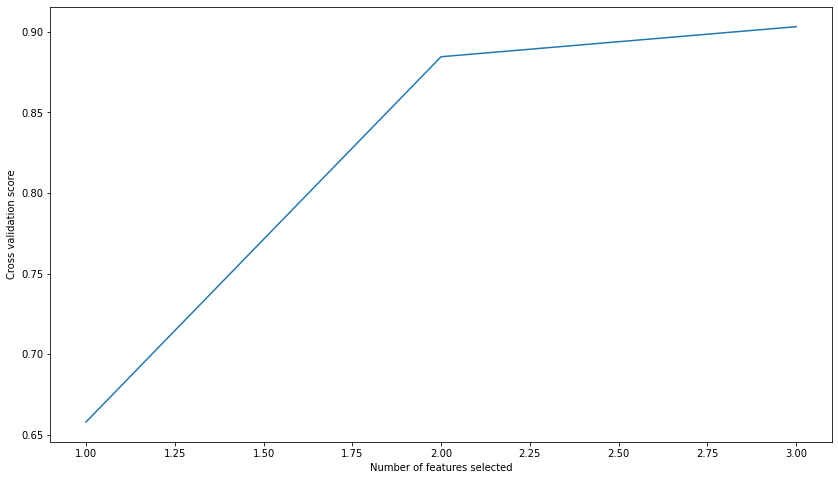

In [156]:
plt.figure(figsize=(14, 8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [128]:
l = []
for col in x.columns[rfe.ranking_ == 1]:
    print(col)
    l.append(col)

age
resting_blood_pressure
cholesterol
max_heart_rate_achieved
st_depression
num_major_vessels
sex_female
sex_male
chest_pain_type_asymptomatic
chest_pain_type_atypical_angina
chest_pain_type_non_anginal_pain
chest_pain_type_typical_angina
fasting_blood_sugar_greater_than_120mg/ml
fasting_blood_sugar_less_than_120mg/ml
rest_ecg_ST-T_wave_abnormality
rest_ecg_left_ventricular_hypertrophy
rest_ecg_normal
exercise_induced_angina_no
exercise_induced_angina_yes
st_slope_downsloping
st_slope_flat
st_slope_upsloping
thalassemia_fixed_defect
thalassemia_normal
thalassemia_reversable_defect


In [129]:
l

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'sex_male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical_angina',
 'chest_pain_type_non_anginal_pain',
 'chest_pain_type_typical_angina',
 'fasting_blood_sugar_greater_than_120mg/ml',
 'fasting_blood_sugar_less_than_120mg/ml',
 'rest_ecg_ST-T_wave_abnormality',
 'rest_ecg_left_ventricular_hypertrophy',
 'rest_ecg_normal',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes',
 'st_slope_downsloping',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_fixed_defect',
 'thalassemia_normal',
 'thalassemia_reversable_defect']

In [157]:
features = x[['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_non_anginal_pain',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_normal',
 'thalassemia_reversable_defect']]

In [158]:
feature = pd.concat([features, y], axis=1)


In [159]:
feature

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,chest_pain_type_asymptomatic,chest_pain_type_non_anginal_pain,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable_defect,condition
0,69,160,234,131,0.1,1,0,0,0,1,0,1,0,1,0,0
1,69,140,239,151,1.8,2,1,0,0,1,0,0,1,1,0,0
2,66,150,226,114,2.6,0,1,0,0,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,0,0,1,0,1,0,1,0,1
4,64,110,211,144,1.8,0,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,181,0.0,0,0,1,0,1,0,0,1,0,1,1
293,39,118,219,140,1.2,0,0,1,0,1,0,1,0,0,1,1
294,35,120,198,130,1.6,0,0,1,0,0,1,1,0,0,1,1
295,35,138,183,182,1.4,0,1,1,0,1,0,0,1,1,0,0


##After Feature Selection

In [160]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               297 non-null    int64  
 1   resting_blood_pressure            297 non-null    int64  
 2   cholesterol                       297 non-null    int64  
 3   max_heart_rate_achieved           297 non-null    int64  
 4   st_depression                     297 non-null    float64
 5   num_major_vessels                 297 non-null    int64  
 6   sex_female                        297 non-null    uint8  
 7   chest_pain_type_asymptomatic      297 non-null    uint8  
 8   chest_pain_type_non_anginal_pain  297 non-null    uint8  
 9   exercise_induced_angina_no        297 non-null    uint8  
 10  exercise_induced_angina_yes       297 non-null    uint8  
 11  st_slope_flat                     297 non-null    uint8  
 12  st_slope

In [161]:
#Train-Test-Split

x = feature.drop('condition', axis=1)
y = feature['condition']

In [162]:
SS = StandardScaler()
feature_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train_r,x_test_r,y_train_r,y_test_r = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train_r1,x_test_r1,y_train_r,y_test_r = train_test_split(feature_scaled,y, test_size = 0.3, random_state = 1) # for KNN

In [163]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=10)
knneig.fit(x_train_r1, y_train_r)
# pred_knneigh = knneig.predict(x_test1)
# score_knneigh_before = accuracy_score(y_test, pred_knneigh)
# print(score_knneigh_before)
predict(knneig,x_train_r1,y_train_r,x_test_r1,y_test_r)
print(classification_report(y_test_r, knneig.predict(x_test_r1)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(knneig, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 86.47
Testing  Accuracy: 83.33
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        51
           1       0.76      0.90      0.82        39

    accuracy                           0.83        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90

Cross Validation Score: 0.671 (0.079)


In [168]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 0)

predict(rf,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, rf.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 100.0
Testing  Accuracy: 85.56
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.78      0.92      0.85        39

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.86      0.86        90

Cross Validation Score: 0.821 (0.060)


In [169]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, lr.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 88.41
Testing  Accuracy: 86.67
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.81      0.90      0.85        39

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

Cross Validation Score: 0.852 (0.051)


In [170]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, gbc.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(gbc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 100.0
Testing  Accuracy: 77.78
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        51
           1       0.70      0.85      0.77        39

    accuracy                           0.78        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.79      0.78      0.78        90

Cross Validation Score: 0.808 (0.056)


In [172]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, svc.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 87.44
Testing  Accuracy: 83.33
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        51
           1       0.76      0.90      0.82        39

    accuracy                           0.83        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90

Cross Validation Score: 0.817 (0.058)


In [173]:
#GaussianNB

nb = GaussianNB()
predict(nb,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, nb.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(nb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 86.47
Testing  Accuracy: 82.22
              precision    recall  f1-score   support

           0       0.95      0.73      0.82        51
           1       0.73      0.95      0.82        39

    accuracy                           0.82        90
   macro avg       0.84      0.84      0.82        90
weighted avg       0.85      0.82      0.82        90

Cross Validation Score: 0.827 (0.067)


In [174]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
predict(mlp,x_train_r,y_train_r,x_test_r,y_test_r)
print(classification_report(y_test_r, mlp.predict(x_test_r)))

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(mlp, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross Validation Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Training Accuracy: 65.7
Testing  Accuracy: 57.78
              precision    recall  f1-score   support

           0       0.93      0.27      0.42        51
           1       0.51      0.97      0.67        39

    accuracy                           0.58        90
   macro avg       0.72      0.62      0.55        90
weighted avg       0.75      0.58      0.53        90

Cross Validation Score: 0.823 (0.069)


In [175]:
# ROC Curve

r_probs = [0 for _ in range(len(y_test_r))]
KNN_probs = knneig.predict_proba(x_test_r1)
RF_probs = rf.predict_proba(x_test_r)
GBC_probs = gbc.predict_proba(x_test_r)
NB_probs = nb.predict_proba(x_test_r)
LR_probs = lr.predict_proba(x_test_r)
svc_probs = svc.predict_proba(x_test_r)
mlp_probs = mlp.predict_proba(x_test_r)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
NB_probs = NB_probs[:, 1]
svc_probs = svc_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test_r, r_probs)
KNN_auc = roc_auc_score(y_test_r, KNN_probs)
RF_auc = roc_auc_score(y_test_r, RF_probs)
GBC_auc = roc_auc_score(y_test_r, GBC_probs)
LR_auc = roc_auc_score(y_test_r, LR_probs)
NB_auc = roc_auc_score(y_test_r, NB_probs)
svc_auc = roc_auc_score(y_test_r, svc_probs)
mlp_auc = roc_auc_score(y_test_r, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test_r, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test_r, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test_r, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test_r, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test_r, LR_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test_r, NB_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test_r, svc_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test_r, mlp_probs)

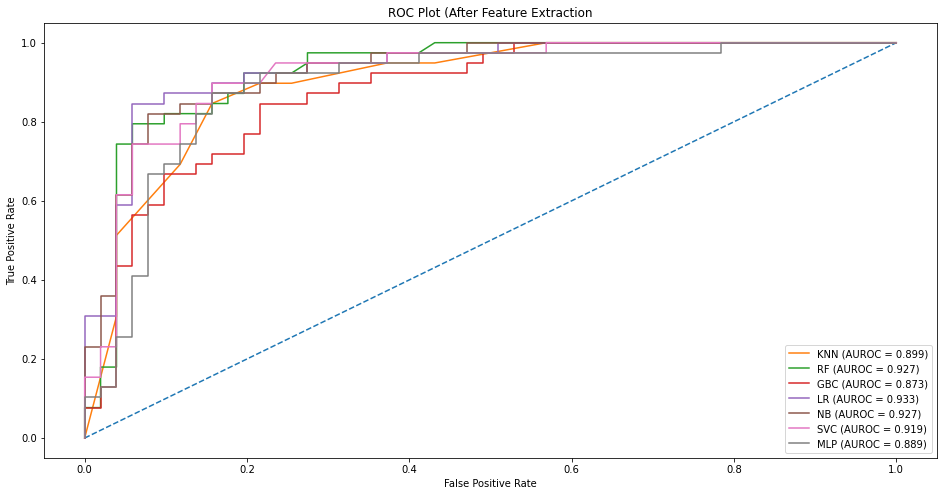

In [176]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(NB_fpr, NB_tpr, label='NB (AUROC = %0.3f)' % NB_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(mlp_fpr, mlp_tpr, label='MLP (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot (After Feature Extraction')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()